In [ ]:
!pip install arabic_reshaper
!pip install python-bidi
!pip install emoji 

     |████████████████████████████████| 175 kB 6.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1c3fb5d14f196563294cccbc9b1847381077f5a5c6f7b1ed6820cdf63028d7c2
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import nltk
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import arabic_reshaper 

from wordcloud import WordCloud
from bidi.algorithm import get_display
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = stopwords.words("arabic")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Reading CSV file

In [ ]:
# data_df=pd.read_csv("/content/bankExtraction.csv")
data_df=pd.read_csv("/content/bankExtractionClassificationNew.csv")

## Data exploration

In [ ]:
len(data_df)

27205

In [ ]:
data_df.head(10)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,ملاك #دار_الأركان يومي فوق 10.78 للأهداف بالشارت\n\n#المؤشر \n#تاسي\n#السوق_السعودي\n#الأسهم_السعودية\n#الأسهم\n#أرامكو\n#سابك\n#مصرف_الراجحي\n#بنك_الراجحي\n#الراجحي\n#المؤشر_العام\n#محب_الخير https://t.co/paLIYkWWYV,0,0,203,2022-02-23 06:23:13+00:00,ملاك دارالاركان يومي 1078 للاهداف بالشارت المؤشر تاسي السوقالسعودي الاسهمالسعوديه الاسهم ارامكو سابك مصرفالراجحي بنكالراجحي الراجحي المؤشرالعام محبالخير,152,neutral
1,•البنوك المستلمة: الأهلي السعوي | مصرف الراجحي | ساب | بنك الرياض\n\n•تم تغطية حصة المؤسسات البالغة 25.5 مليون سهم ب 54 مرة وتحديد السعر النهائي ب 73 ريال للسهم https://t.co/Cc3uswJJxv,0,0,182,2022-02-23 06:19:55+00:00,البنوك المستلمه الاهلي السعوي مصرف الراجحي ساب بنك الرياض تم تغطيه حصه المؤسسات البالغه 255 مليون سهم 54 مره وتحديد السعر النهائي 73 للسهم,141,neutral
2,#الضمان_الاجتماعي_المطور ليش بنك الراجحي ينزل أول شي قبل البنوك الاخرئ ؟ وبعدها بقية البنوك بي 9 ساعات او أكثر 😂🙇😹 عندما تكون وزير أفعل ما شءت ههههههههههه \n#عاجل,1,0,163,2022-02-23 06:15:42+00:00,الضمانالاجتماعيالمطور ليش بنك الراجحي ينزل شي البنوك الاخرئ وبعدها بقيه البنوك 9 ساعات او عندما تكون وزير افعل شءت هه عاجل,124,neutral
3,@stcpay_ksa السلام عليكم ورحمة الله وبركاته\n\nحولت مبلغ مالي إلى المحفظة من بنك الراجحي قبل 3 أيام وحتى وما وصلت إلى ربع المبلغ وانا محتاج المبلغ ضروري\n\nاتمنى تتواصلون معي على الخاص لانه الخدمة في التطبيق ما يردون ابدا\n\n@stcpay_ksa 🙏,0,0,232,2022-02-23 06:13:04+00:00,السلام عليكم ورحمه الله وبركاته حولت مبلغ مالي المحفظه بنك الراجحي 3 ايام وحتي وصلت ربع المبلغ وانا محتاج المبلغ ضروري اتمني تتواصلون معي الخاص لانه الخدمه التطبيق يردون ابدا,175,negative
4,#داركو_تبارك_للاتحاد\n\nسداد قروض جميع البنوك \nسداد ايقاف الخدمات والمتعثرات\nسداد تـ ( العقاري )\n\n(عرض خاص لفترة محدودة 30 راتب)\n\n* بنك الاهلي\n* بنك الرياض \n* بنك الراجحي \n \nالشروط \n\n🚨الراتب يكون 8 الاف واكثر \n🚨عدم وجود متعثرات\n\n📍فروعنا:الرياض ، الدمام\n\n📲 ابو سلطان\n\n0503635371 https://t.co/b9CnthR6oV,0,0,299,2022-02-23 06:09:17+00:00,داركوتباركللاتحاد سداد قروض البنوك سداد ايقاف الخدمات والمتعثرات سداد ت العقاري عرض خاص لفتره محدوده 30 راتب بنك الاهلي بنك الرياض بنك الراجحي الشروط الراتب يكون 8 الاف واكثر عدم وجود متعثرات فروعناالرياض الدمام ابو سلطان 0503635371,239,neutral
5,#جاهزين_من_بدينا\n\nسداد قروض جميع البنوك \nسداد ايقاف الخدمات والمتعثرات\nسداد تـ ( العقاري )\n\n(عرض خاص لفترة محدودة 30 راتب)\n\n* بنك الاهلي\n* بنك الرياض \n* بنك الراجحي \n \nالشروط \n\n🚨الراتب يكون 8 الاف واكثر \n🚨عدم وجود متعثرات\n\n📍فروعنا:الرياض ، الدمام\n\n📲 ابو سلطان\n\n0503635371 https://t.co/P5BoELeEiN,0,0,295,2022-02-23 06:06:14+00:00,جاهزينمنبدينا سداد قروض البنوك سداد ايقاف الخدمات والمتعثرات سداد ت العقاري عرض خاص لفتره محدوده 30 راتب بنك الاهلي بنك الرياض بنك الراجحي الشروط الراتب يكون 8 الاف واكثر عدم وجود متعثرات فروعناالرياض الدمام ابو سلطان 0503635371,235,neutral
6,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,0,0,52,2022-02-23 06:06:12+00:00,نزل الحمدلله بنك الراجحي,24,neutral
7,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,0,0,65,2022-02-23 06:04:52+00:00,انا نزل الساعه ٠١٠١ بنك الراجحي,31,neutral
8,#الغاء_اشتراك_ssc\n\nسداد قروض جميع البنوك \nسداد ايقاف الخدمات والمتعثرات\nسداد تـ ( العقاري )\n\n(عرض خاص لفترة محدودة 30 راتب)\n\n* بنك الاهلي\n* بنك الرياض \n* بنك الراجحي \n \nالشروط \n\n🚨الراتب يكون 8 الاف واكثر \n🚨عدم وجود متعثرات\n\n📍فروعنا:الرياض ، الدمام\n\n📲 ابو سلطان\n\n0503635371 https://t.co/BlHnqzGfs9,0,0,296,2022-02-23 06:04:12+00:00,الغاءاشتراكssc سداد قروض البنوك سداد ايقاف الخدمات والمتعثرات سداد ت العقاري عرض خاص لفتره محدوده 30 راتب بنك الاهلي بنك الرياض بنك الراجحي الشروط الراتب يكون 8 الاف واكثر عدم وجود متعثرات فروعناالرياض الدمام ابو سلطان 0503635371,236,neutral
9,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,0,0,62,2022-02-23 06:03:52+00:00,صارت بنك الرياض الي الراجحي قعدت شهور,37,neutral


In [ ]:
data_df.tail(10)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
28364,@AlRajhiCapital أرغب تحديث الهويه للتداول,0,0,41,2022-02-23 15:46:59+00:00,ارغب تحديث الهويه للتداول,25,NaN
28365,@AlRajhiCapital كيف اسجل في تداول الراجحي,0,0,41,2022-02-23 15:46:06+00:00,اسجل تداول الراجحي,18,NaN
28366,@AlRajhiBankCare @555443322F @AlRajhiCapital لو سمحت بالله شوف الخاص,0,0,68,2022-02-23 15:43:54+00:00,سمحت بالله شوف الخاص,20,NaN
28367,@alhanouf_muh اهلا وسهلا الهنوف\nبخصوص الاستثمار كان ودنا نخدمك بعيوننا لكن الاستفسار من اختصاص الراجحي المالية @AlRajhiCapital\n\nطاب يومك 🙏🏻,0,0,139,2022-02-23 15:42:54+00:00,اهلا وسهلا الهنوف بخصوص الاستثمار ودنا نخدمك بعيوننا الاستفسار اختصاص الراجحي الماليه طاب يومك,95,NaN
28368,@AlRajhiCapital سلام بعت اسهم اكتتاب يوم الاحد للان لم تنزل بالحساب الجاري كيف كذا. تقولون يومين عمل الان لي اربع اسام,0,0,118,2022-02-23 15:40:33+00:00,سلام بعت اسهم اكتتاب يوم الاحد للان تنزل بالحساب الجاري كذا تقولون يومين عمل الان اربع اسام,91,NaN
28369,@555443322F هلا والله \nتقدر عن طريق تطبيق الراجحي المالية 🤳\nتبيع اسهمك او تتداول 📉\nوإذا حاب تستفسر عن طريقة التسجيل في التطبيق تواصل مع الراجحي الماليه ⁦@AlRajhiCapital⁩\n\nطاب يومك 🙏🏻,0,0,182,2022-02-23 15:40:12+00:00,والله تقدر طريق تطبيق الراجحي الماليه تبيع اسهمك او تتداول حاب تستفسر طريقه التسجيل التطبيق تواصل الراجحي الماليه ⁦ طاب يومك,127,NaN
28370,@AlRajhiCapital يخي والله مايصير تقعدون تسحبون فيني \nهويتي ماهي منتهيه ولا اقدر اسحب فلوسي ليه يخي التسحيب هذا https://t.co/WqHt8IUc8E,0,0,134,2022-02-23 15:38:48+00:00,يخي والله مايصير تقعدون تسحبون فيني هويتي ماهي منتهيه اقدر اسحب فلوسي ليه يخي التسحيب,85,NaN
28371,@AlRajhiCapital سويت متابعة,0,0,27,2022-02-23 15:31:10+00:00,سويت متابعه,11,NaN
28372,@zayed_alharbi22 @AlRajhiCapital ممممممم🤔🤔🤔🤔,0,0,44,2022-02-23 15:29:04+00:00,مم,2,NaN
28373,@AlRajhiCapital تم فتح شكوى بأعاده استرجاع مبلغ مخصوم مني بسبب عطل مكينه الصراف وبنك الراجحي يماطلني من وقتها لاأجابه كافيه ولاأهتمام بالعملاء وكل واحد يصرفني ويعلم الله بحاجتي الماسه للمبلغ وحقوق الناس ماينفع يصير فيها مماطله @SAMAcares,0,0,238,2022-02-23 15:24:03+00:00,تم فتح شكوي باعاده استرجاع مبلغ مخصوم مني بسبب عطل مكينه الصراف وبنك الراجحي يماطلني وقتها لااجابه كافيه ولااهتمام بالعملاء وكل يصرفني ويعلم الله بحاجتي الماسه للمبلغ وحقوق الناس ماينفع يصير مماطله,197,NaN


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28374 entries, 0 to 28373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet           28374 non-null  object
 1   Retweets        28374 non-null  int64 
 2   Likes           28374 non-null  int64 
 3   Length          28374 non-null  int64 
 4   Created At      28374 non-null  object
 5   Cleaned         28370 non-null  object
 6   Cleaned length  28374 non-null  int64 
 7   Classification  2489 non-null   object
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


In [ ]:
#Generates descriptive statistics or Summary Statistic of the numeric columns
data_df.describe()

,Retweets,Likes,Length,Cleaned length
count,28374.000000,28374.000000,28374.000000,28374.000000
mean,0.476775,0.568584,99.586452,66.888701
std,10.441284,15.725185,68.720135,57.693880
min,0.000000,0.000000,14.000000,0.000000
25%,0.000000,0.000000,49.000000,25.000000
50%,0.000000,0.000000,77.000000,47.000000
75%,0.000000,0.000000,127.000000,90.000000
max,530.000000,1666.000000,525.000000,270.000000


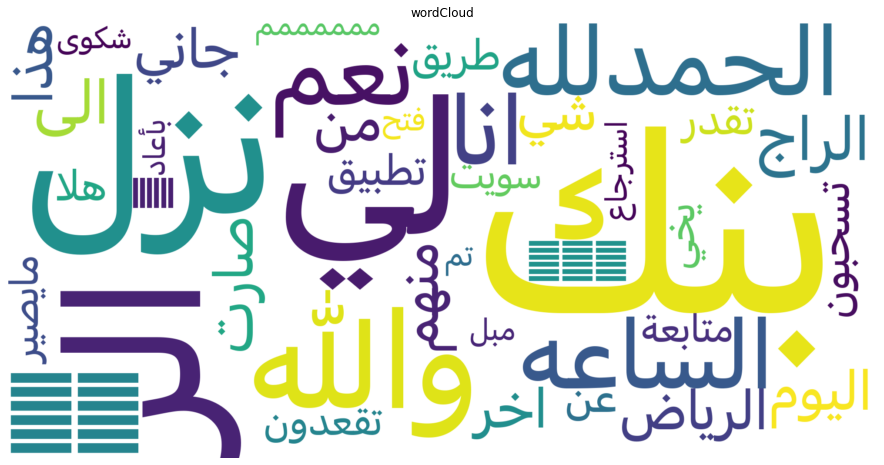

In [ ]:
text = str(data_df['Tweet'])

#remove english letters
text = re.sub(r'[a-zA-Z]', r'', text)

reshaped_text = arabic_reshaper.reshape(text)  

data = get_display(reshaped_text)

Cloud = WordCloud(
    font_path= '/content/SFArabic.ttf', # arabic font to display arabic letters
     background_color='white', mode='RGB', width=2000, height=1000, max_words=600).generate(data)

plt.figure(figsize=(16,8))

plt.title("wordCloud")
plt.axis("off")

plt.imshow(Cloud, interpolation= "bilinear")

plt.show()

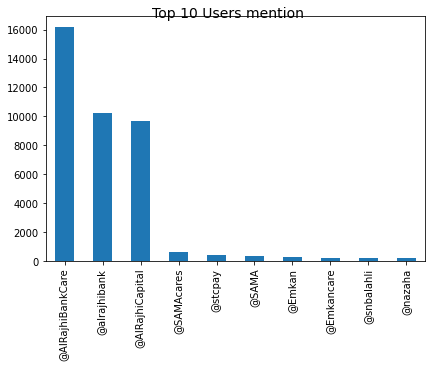

In [ ]:
#find most frequent mentions
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Users mention', fontsize=14)
data_df['Tweet'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar')
plt.show()

In [ ]:
#most liked tweets
data_df.nlargest(5,['Likes'])

,Tweet,Retweets,Likes,Length,Created At
1692,ثريد طريقه الادخار اموالك في بنك الراجحي✨💳 htt...,54,1666,66,2022-02-17 20:38:57+00:00
1383,ادفع نصف ثروتي الي في بنك الراجحي اذا احد عرف ...,141,1082,86,2022-02-19 13:33:03+00:00
740,اكتتاب شركة النهدي الطبية:\n• المطروح للافراد:...,184,996,249,2022-02-20 19:36:22+00:00
36818,تحديد النطاق السعري للسهم بين 58 و63 ريالاً سع...,530,744,184,2022-02-23 20:15:22+00:00
563,اكتتاب شركة النهدي الطبية:\n• بداية اكتتاب الا...,93,484,238,2022-02-21 09:38:56+00:00


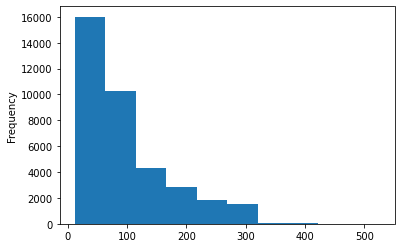

In [ ]:
#x-axis represent tweet length, y-axis represent the frequency
data_df['Length'].plot(kind='hist')
plt.show()

## Pre-processing

In [ ]:
#add new column for cleaned text
data_df['Cleaned'] = data_df['Tweet']

In [ ]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
data_df.head(5)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,0,0,52,2022-02-23 06:06:12+00:00,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,24.0,neutral
1,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,0,0,65,2022-02-23 06:04:52+00:00,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,31.0,neutral
2,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,0,0,62,2022-02-23 06:03:52+00:00,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,40.0,neutral
3,@khuloodotb511 هذا اخر شي جاني منهم اليوم بنك الراجحي https://t.co/s16cNzaUZF,0,0,77,2022-02-23 05:44:25+00:00,@khuloodotb511 هذا اخر شي جاني منهم اليوم بنك الراجحي https://t.co/s16cNzaUZF,34.0,neutral
4,@ALRABOAH2014 @Maleki2038Malek @BLA50F بنك الراجحي الآن الأهلي ساعه 10,0,0,70,2022-02-23 05:37:14+00:00,@ALRABOAH2014 @Maleki2038Malek @BLA50F بنك الراجحي الآن الأهلي ساعه 10,26.0,neutral


In [ ]:
data_df.columns

Index(['Tweet', 'Retweets', 'Likes', 'Length', 'Created At', 'Cleaned',
       'Cleaned length', 'Classification'],
      dtype='object')

###Remove tashkeel

In [ ]:
tashkelArr = ['َ','ِ','ُ','ْ','ّ','ً','ٍ','ٌ']
count=0
for i in data_df['Cleaned']:
    count=count+1
    for j in tashkelArr:
       if j in i:
          data_df['Cleaned'][count-1]=data_df['Cleaned'][count-1].replace(j,"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Filter Text

In [ ]:
# Filtering URLs, mentions, hashtags, Empty new lines
def filterText(Tweet):

  # remove URLs
  Tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',Tweet)

  # remove mentions
  Tweet = re.sub('@[^\s]+', ' ', Tweet)

  # drop hashtag symbol
  # Tweet = re.sub('#([^\s]+)', r'\1', Tweet)
  
  Tweet = Tweet.replace("#", "").replace("_", " ")


  # remove new lines with white space
  Tweet = Tweet.replace('\n',' ')
  Tweet = Tweet.replace('\t',' ')

  return Tweet

data_df['Cleaned'] = data_df['Cleaned'].apply(filterText)

###Remove Stopwords

In [ ]:
print(len(stop_words))
keep_words = [
            "لا",
            "ما",
            "غير",
            "ريال",
            "هلله",
            "عن",
            "من",
            "أكثر",
            "أقل",
            "غير",
            "أكثر",
            "اقل",
            "او",
            "بس",
            "لا",
            "من",
            "الا",
            "ان",
            "و",
            "الي",
            "علي",
            "انا",
            "او",
            "ما",
            "عدا",
            "لم",
            "لن",

];

for word in list(stop_words):  
      if word in keep_words:
          stop_words.remove(word)
          
print(len(stop_words))


def removeStopWords(Tweet):
  # Arabic stop words with nltk
  

  Tweet = ' '.join(word for word in Tweet.split() if word not in stop_words)
  return Tweet

data_df['Cleaned'] = data_df['Cleaned'].apply(removeStopWords)

737
737


###Remove Punctuations

In [ ]:
# Removing punctuations
def removePunctuations(Tweet):
  punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟¥£€•.,'{}~¦+|!”…“–ـ''' + string.punctuation
  translator = str.maketrans('', '', punctuations)
  Tweet= Tweet.translate(translator)
  return Tweet


data_df['Cleaned'] = data_df['Cleaned'].apply(removePunctuations)
data_df.head(10)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,0,0,52,2022-02-23 06:06:12+00:00,نعم نزل الحمدلله بنك الراجحي,24.0,neutral
1,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,0,0,65,2022-02-23 06:04:52+00:00,انا نزل لي الساعه ٠١٠١ ص بنك الراجحي,31.0,neutral
2,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,0,0,62,2022-02-23 06:03:52+00:00,صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,40.0,neutral
3,@khuloodotb511 هذا اخر شي جاني منهم اليوم بنك الراجحي https://t.co/s16cNzaUZF,0,0,77,2022-02-23 05:44:25+00:00,هذا اخر شي جاني منهم اليوم بنك الراجحي,34.0,neutral
4,@ALRABOAH2014 @Maleki2038Malek @BLA50F بنك الراجحي الآن الأهلي ساعه 10,0,0,70,2022-02-23 05:37:14+00:00,بنك الراجحي الآن الأهلي ساعه 10,26.0,neutral
5,"""اقولك تو شفت سنابه لسلطه قديم داق على عمه نايف يقوله ابي سلف تخيلي عمه قال بنك الراجحي يتسلف مني 😭😭😭😭😭ماشاء الله، ظريف ولدنا😂"" - 😭😭😭 #tellonym https://t.co/liKXN2iu0f",0,1,168,2022-02-23 05:16:37+00:00,اقولك تو شفت سنابه لسلطه قديم داق على عمه نايف يقوله ابي سلف تخيلي عمه قال بنك الراجحي يتسلف مني 😭😭😭😭😭ماشاء الله ظريف ولدنا😂 😭😭😭 tellonym,125.0,neutral
6,#البوليفارد_اليوم \n#فديو_رهف_القحطاني\n\nالــسلام علـيكم\n\nتســديد قـروض بـنك الراجـحي ''\n\nاستخراج قرض جديد ✔️\n\nاستخراج جــسـر اضافي ✔️\n\nاستخراج قرض مـؤجل ✔️\n\n🔴للاستفسارات \n\nواتساب فقط حياكم \n\n0555897157,1,1,200,2022-02-23 05:15:48+00:00,البوليفارد اليوم فديو رهف القحطاني السلام عليكم تسديد قروض بنك الراجحي استخراج قرض جديد ✔️ استخراج جسر اضافي ✔️ استخراج قرض مؤجل ✔️ 🔴للاستفسارات واتساب فقط حياكم 0555897157,165.0,neutral
7,@mn543216 @HB9il نزل الساعة ١ بنك الراجحي \nلكن الذي عنده الدفعة معلقة ما نزل لا راجحي ولا غيره,0,0,94,2022-02-23 04:49:31+00:00,نزل الساعة ١ بنك الراجحي لكن الذي عنده الدفعة معلقة ما نزل لا راجحي ولا غيره,63.0,neutral
8,"@News_Ejazah -لعملاء بنك الاهلي(١٨ /١٩) راتب \n-لعملاء بنك الراجحي(١٨/ ٢٣)راتب \n-عملاء بنك الرياض(١٨ /٢٣)راتب \n لمدينة(الرياض-القصيم-الدمام-تبوك جده-حايل-الجوف-جازان-نجران-ابها\n-تمويل للقطاع الخاص\n-متوفر لدينا تمويل عقاري(المدعوم\n""بدون تحويل راتب""\n ج/٠٥٥٩٨٩٩٨٩٠",0,1,260,2022-02-23 04:45:57+00:00,لعملاء بنك الاهلي١٨ ١٩ راتب لعملاء بنك الراجحي١٨ ٢٣راتب عملاء بنك الرياض١٨ ٢٣راتب لمدينةالرياضالقصيمالدمامتبوك جدهحايلالجوفجازاننجرانابها تمويل للقطاع الخاص متوفر لدينا تمويل عقاريالمدعوم بدون تحويل راتب ج٠٥٥٩٨٩٩٨٩٠,215.0,neutral
9,"@SaudiNews50 -لعملاء بنك الاهلي ( ١٨ /١٩) راتب \n-لعملاء بنك الراجحي(١٨/ ٢٣)راتب \n-عملاء بنك الرياض(١٨ / ٢٣)راتب \n\n لمدينة (الرياض-القصيم-الدمام-تبوك جده-الطايف-المدينه- الجوف- مكه- جازان-نجران-ابها)\n-تمويل للقطاع الخاص (معتمد-غير معتمد)\n-متوفر لدينا تمويل عقاري(المدعوم)\n""بدون تحويل راتب""",0,1,289,2022-02-23 04:44:13+00:00,لعملاء بنك الاهلي ١٨ ١٩ راتب لعملاء بنك الراجحي١٨ ٢٣راتب عملاء بنك الرياض١٨ ٢٣راتب لمدينة الرياضالقصيمالدمامتبوك جدهالطايفالمدينه الجوف مكه جازاننجرانابها تمويل للقطاع الخاص معتمدغير معتمد متوفر لدينا تمويل عقاريالمدعوم بدون تحويل راتب,237.0,neutral


### Normalize text

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text
  
data_df['Cleaned'] = data_df['Cleaned'].apply(normalize_arabic)

###Remove repeated letters

In [ ]:

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)
data_df['Cleaned'] = data_df['Cleaned'].apply(remove_repeating_char)


###Remove emojis

In [ ]:
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

data_df['Cleaned'] = data_df['Cleaned'].apply(remove_emoji)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  


In [ ]:
droped = data_df.index[data_df['Tweet'].str.contains("قروض من بنك التنمية")]

data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("البنوك المستلمة")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("البنوك المستلمه")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("شدات ببجي")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("@stcpay_ksa")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("اكتتاب")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("#سداد_القروض")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("سداد قروض")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("#تسديد_القروض")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("عرض السنه الجديده2022 بنك الراجحي")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("تسديدالقروضوتعثرات_سمه")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("فوز")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("افوز")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("#الضمان_الاجتماعي")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("سداد_المتعثرات")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("#تمويل")]
data_df.drop(droped, inplace=True)

droped= data_df.index[data_df['Tweet'].str.contains("ملاك")]
data_df.drop(droped, inplace=True)

len(data_df)

27175

In [ ]:
data_df.head(5)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,0,0,52,2022-02-23 06:06:12+00:00,نعم نزل الحمدلله بنك الراجحي,30,neutral
1,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,0,0,65,2022-02-23 06:04:52+00:00,انا نزل لي الساعه ٠١٠١ ص بنك الراجحي,38,neutral
2,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,0,0,62,2022-02-23 06:03:52+00:00,صارت لي من بنك الرياض الي الراجحي قعدت ست شهور,49,neutral
3,@khuloodotb511 هذا اخر شي جاني منهم اليوم بنك الراجحي https://t.co/s16cNzaUZF,0,0,77,2022-02-23 05:44:25+00:00,هذا اخر شي جاني منهم اليوم بنك الراجحي,42,neutral
4,@ALRABOAH2014 @Maleki2038Malek @BLA50F بنك الراجحي الآن الأهلي ساعه 10,0,0,70,2022-02-23 05:37:14+00:00,بنك الراجحي الان الاهلي ساعه 10,33,neutral


###Remove duplicate

In [ ]:
# to view duplicate rows if any
duplicateRowsDF = data_df[data_df.duplicated(keep='last', subset = 'Cleaned')]

# sort the dataframe for better display
from natsort import index_natsorted, order_by_index

sorted_df = duplicateRowsDF.reindex(index=order_by_index(duplicateRowsDF.index, index_natsorted(duplicateRowsDF['Cleaned'], reverse=True)))



# to display all duplicate tweets:

# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        #'display.precision', 3,
#                        ):
#     # display(sorted_df)

# to display part of duplicate tweets
display(sorted_df)

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
15518,#مطاعم_الرومانسيه\n🔥🔥الآن الآن الآن ارسل وازهل🔥🔥🔥\nقروض بنك التنمية120الف بدون فوائد \n🕳️\nاصدار وثيقة العمل الحر فورية ✔️\nقرض العمل الحر\nقرض الاسرة\nقرض الزواج\nأتعابي في ذمتك بعد الانجاز\nوخدمات الكترونيا اخرة\n1قروض امكان قطاع خاص\n3قروض الراجحي\n4دعم \nhttps://t.co/OfowEqG5Nf,0,0,269,2022-03-03 16:12:50+00:00,مطاعم الرومانسيه الان الان الان ارسل وازهل قروض بنك التنميه120الف بدون فوائد اصدار وثيقه العمل الحر فوريه قرض العمل الحر قرض الاسره قرض الزواج اتعابي في ذمتك بعد الانجاز وخدمات الكترونيا اخره 1قروض امكان قطاع خاص 3قروض الراجحي 4دعم,244,NaN
22765,@23103Sasa هلا والله 👋\nحافظ على أمن معلوماتك الشخصية ولاتعطيها أحد 🔒\nيمكنك رفع الطلب من خلال تطبيق إمكان 📲\nأو التواصل عبر الهاتف:8001240251☎️\nأو زيارة فروع إمكان أو فروع مصرف الراجحي 🏛️\n\nيومك جميل 💜,0,0,198,2022-02-27 19:45:32+00:00,هلا والله حافظ علي امن معلوماتك الشخصيه ولاتعطيها احد يمكنك رفع الطلب من خلال تطبيق امكان او التواصل عبر الهاتف8001240251 او زياره فروع امكان او فروع مصرف الراجحي يومك جميل,188,NaN
22283,@MkafehA هلا والله \nتنورنا بكل مكان مع إمكان💙🙏\nنخدمك بعيوننا من خلال تطبيق إمكان 📱\nاو الاتصال على الرقم 8001240251 📞\nوتقدر بعد تنورنا في احد فروع إمكان او احد فروع مصرف الراجحي 🏦.\nمع العلم أن تطبيقنا متاح 24 ساعة⏰\nhttps://t.co/aZcH5nWg9h\nيومك سعيد 💜,0,0,249,2022-03-03 14:22:31+00:00,هلا والله تنورنا بكل مكان مع امكان نخدمك بعيوننا من خلال تطبيق امكان او الاتصال علي الرقم 8001240251 وتقدر بعد تنورنا في احد فروع امكان او احد فروع مصرف الراجحي مع العلم ان تطبيقنا متاح 24 ساعه يومك سعيد,218,NaN
23234,"@zam139 هلا والله 👋\nتنورنا بكل مكان مع إمكان🙏\nنخدمك بعيوننا من خلال تطبيق ""إمكان"" 📱\nاو الاتصال على الرقم 8001240251 📞\nوتقدر بعد تنورنا في احد فروع إمكان او احد فروع مصرف الراجحي 🏦.\nمع العلم أن تطبيقنا متاح ""24 ساعة"" ⏰\nيومك سعيد 💜",0,0,229,2022-02-24 13:46:54+00:00,هلا والله تنورنا بكل مكان مع امكان نخدمك بعيوننا من خلال تطبيق امكان او الاتصال علي الرقم 8001240251 وتقدر بعد تنورنا في احد فروع امكان او احد فروع مصرف الراجحي مع العلم ان تطبيقنا متاح 24 ساعه يومك سعيد,218,NaN
14107,@Ay_788 @AlRajhiCapital شكرا لك❤️❤️❤️,0,0,37,2022-02-19 10:58:50+00:00,شكرا لك,15,NaN
12088,@memee19800 الرجاء التعامل مع حساباتنا الرسمية، والحذر من الحسابات الوهمية اللي تدّعي بأنها تابعة لإمكان\n\nتقدر تطلب تمويلك عن طريق تطبيق إمكان 📱\nأو الاتصال على 8001240251\nأو زيارة فروع إمكان، أو فروع مصرف الراجحي\n\nنخدمك بعيوننا بكل أمان ومصداقية \nيومك سعيد 💜,0,0,258,2022-02-17 01:50:25+00:00,الرجاء التعامل مع حساباتنا الرسميه والحذر من الحسابات الوهميه اللي تدعي بانها تابعه لامكان تقدر تطلب تمويلك عن طريق تطبيق امكان او الاتصال علي 8001240251 او زياره فروع امكان او فروع مصرف الراجحي نخدمك بعيوننا بكل امان ومصداقيه يومك سعيد,245,NaN
22248,@alrajhibank cc: @AlRajhiBankCare,0,0,33,2022-02-24 18:10:51+00:00,cc,6,NaN


In [ ]:
#number of duplicate tweets
len(sorted_df)

7

In [ ]:
len(data_df)

27175

In [ ]:
#remove duplicate
data_df.drop_duplicates(subset = 'Cleaned', keep = 'last', inplace = True)

In [ ]:
#length after removing duplicate
len(data_df)

27168

In [ ]:
#display duplicate rows if any
data_df[data_df.duplicated(keep='last', subset = 'Cleaned')]


,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification


### Display result

In [ ]:
#add column for cleaned text length
data_df['Cleaned length'] = data_df['Cleaned'].apply(len)

In [ ]:
data_df

,Tweet,Retweets,Likes,Length,Created At,Cleaned,Cleaned length,Classification
0,@omar_koshan @HRSD_Care نعم نزل الحمدلله بنك الراجحي,0,0,52,2022-02-23 06:06:12+00:00,نعم نزل الحمدلله بنك الراجحي,30,neutral
1,@hani211118 @MA_F_HH @o502b انا نزل لي الساعه ٠١:٠١ ص بنك الراجحي,0,0,65,2022-02-23 06:04:52+00:00,انا نزل لي الساعه ٠١٠١ ص بنك الراجحي,38,neutral
2,@NoAimNoBrain2 صارت لي من بنك الرياض الى الراجحي قعدت ست شهور🦦,0,0,62,2022-02-23 06:03:52+00:00,صارت لي من بنك الرياض الي الراجحي قعدت ست شهور🦦,49,neutral
3,@khuloodotb511 هذا اخر شي جاني منهم اليوم بنك الراجحي https://t.co/s16cNzaUZF,0,0,77,2022-02-23 05:44:25+00:00,هذا اخر شي جاني منهم اليوم بنك الراجحي,42,neutral
4,@ALRABOAH2014 @Maleki2038Malek @BLA50F بنك الراجحي الآن الأهلي ساعه 10,0,0,70,2022-02-23 05:37:14+00:00,بنك الراجحي الان الاهلي ساعه 10,33,neutral
...,...,...,...,...,...,...,...,...
27200,@555443322F هلا والله \nتقدر عن طريق تطبيق الراجحي المالية 🤳\nتبيع اسهمك او تتداول 📉\nوإذا حاب تستفسر عن طريقة التسجيل في التطبيق تواصل مع الراجحي الماليه ⁦@AlRajhiCapital⁩\n\nطاب يومك 🙏🏻,0,0,182,2022-02-23 15:40:12+00:00,هلا والله تقدر عن طريق تطبيق الراجحي الماليه 🤳 تبيع اسهمك او تتداول 📉 واذا حاب تستفسر عن طريقه التسجيل في التطبيق تواصل مع الراجحي الماليه ⁦ طاب يومك 🙏🏻,156,NaN
27201,@AlRajhiCapital يخي والله مايصير تقعدون تسحبون فيني \nهويتي ماهي منتهيه ولا اقدر اسحب فلوسي ليه يخي التسحيب هذا https://t.co/WqHt8IUc8E,0,0,134,2022-02-23 15:38:48+00:00,يخي والله مايصير تقعدون تسحبون فيني هويتي ماهي منتهيه ولا اقدر اسحب فلوسي ليه يخي التسحيب هذا,98,NaN
27202,@AlRajhiCapital سويت متابعة,0,0,27,2022-02-23 15:31:10+00:00,سويت متابعه,13,NaN
27203,@zayed_alharbi22 @AlRajhiCapital ممممممم🤔🤔🤔🤔,0,0,44,2022-02-23 15:29:04+00:00,مم🤔🤔,6,NaN


## Save to CSV

In [ ]:
# To store the result in CSV file, this will delete everything and just store the new dataframe
data_df.to_csv('/content/bankExtractionClassificationNew.csv',index=False)

# To append the result in the previously created CSV file
# df.to_csv('bankExtraction.csv', mode='a')
# df.to_csv('bankExtraction.csv', mode='a, header=False, index=False)